Episode 0, Total Revenue: 63595.0
Episode 100, Total Revenue: 69604.0
Episode 200, Total Revenue: 69773.5
Episode 300, Total Revenue: 69937.0
Episode 400, Total Revenue: 68876.0
Episode 500, Total Revenue: 70245.5
Episode 600, Total Revenue: 72821.5
Episode 700, Total Revenue: 80797.5
Episode 800, Total Revenue: 95026.5
Episode 900, Total Revenue: 106145.0


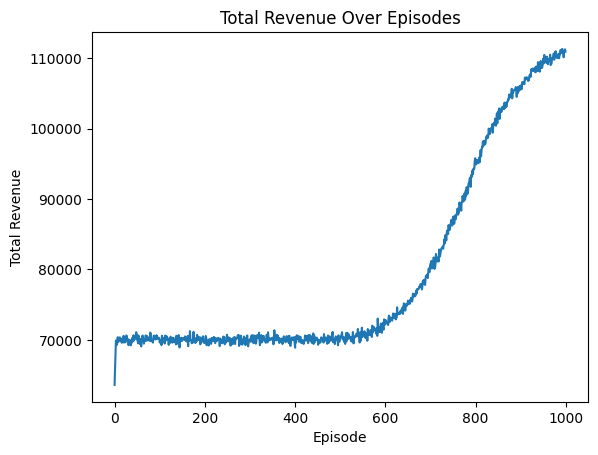

In [8]:
import pandas as pd
import numpy as np
import random


df = pd.read_csv('pricing_adjusted_data.csv')

# Define the pricing model with reinforcement learning
class PricingModelRL:
    def __init__(self, action_space, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = {}  

    def choose_action(self, state):
        # Exploration vs exploitation
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.action_space) 
        else:
            # Exploit: select the best action based on Q-values
            state_str = str(state)
            if state_str not in self.q_table:
                self.q_table[state_str] = {action: 0.0 for action in self.action_space}
            q_values = self.q_table[state_str]
            return max(q_values, key=q_values.get)  # Return action with highest Q-value

    def update_q_table(self, state, action, reward, next_state):
        # Update Q-values using the Q-learning formula
        state_str = str(state)
        next_state_str = str(next_state)
        
        if state_str not in self.q_table:
            self.q_table[state_str] = {action: 0.0 for action in self.action_space}
        
        if next_state_str not in self.q_table:
            self.q_table[next_state_str] = {action: 0.0 for action in self.action_space}
        
        old_q_value = self.q_table[state_str][action]
        future_q_value = max(self.q_table[next_state_str].values())  
        new_q_value = old_q_value + self.learning_rate * (reward + self.discount_factor * future_q_value - old_q_value)
        
        self.q_table[state_str][action] = new_q_value

# Initialize the RL model
pricing_model_rl = PricingModelRL(action_space=[1.0, 1.5, 2.0])

# Training loop for multiple episodes
total_episodes = 1000
episode_rewards = []

for episode in range(total_episodes):
    total_revenue = 0
    for idx in range(len(df)):
        state = [df.iloc[idx]['Expected_Ride_Duration'], df.iloc[idx]['Historical_Cost_of_Ride']]
        action = pricing_model_rl.choose_action(state)
        price_adjusted = action
        
        # Calculate revenue
        revenue = price_adjusted * df.iloc[idx]['Number_of_Riders']
        total_revenue += revenue
        
        next_state = state  
        reward = revenue  

        # Update Q-table
        pricing_model_rl.update_q_table(state, action, reward, next_state)

    episode_rewards.append(total_revenue)

    if episode % 100 == 0:
        print(f"Episode {episode}, Total Revenue: {total_revenue}")

# Plot total revenue over episodes
import matplotlib.pyplot as plt

plt.plot(range(total_episodes), episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Episodes')
plt.show()


import pickle
with open('pricing_model_rl.pkl', 'wb') as file:
    pickle.dump(pricing_model_rl, file)
